### Features: <font size=3>
<ul>
<li>Accident_ID:             unique id assigned to each row</li>
<li>Accident_Type_Code:      the type of accident (factor, not numeric)</li>
<li>Cabin_Temperature:       the last recorded temperature before the incident, measured in degrees fahrenheit</li>
<li>Turbulence_In_gforces:   the recorded/estimated turbulence experienced during the accident</li>
<li>Control_Metric:          an estimation of how much control the pilot had during the incident given the factors at play</li>
<li>Total_Safety_Complaints: number of complaints from mechanics prior to the accident</li>
<li>Days_Since_Inspection:   how long the plane went without inspection before the incident</li>
<li>Safety_Score:            a measure of how safe the plane was deemed to be</li>
<li>Severity:                a description (4 level factor) on the severity of the crash [Target].</li>
</ul>

Importing the essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the dataset

In [3]:
df=pd.read_csv('AirplaneAccident.csv')

In [4]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Accident_ID
0,Minor_Damage_And_Injuries,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352,7570
1,Minor_Damage_And_Injuries,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350,12128
2,Significant_Damage_And_Fatalities,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364,2181
3,Significant_Damage_And_Serious_Injuries,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728,5946
4,Significant_Damage_And_Fatalities,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883,9054


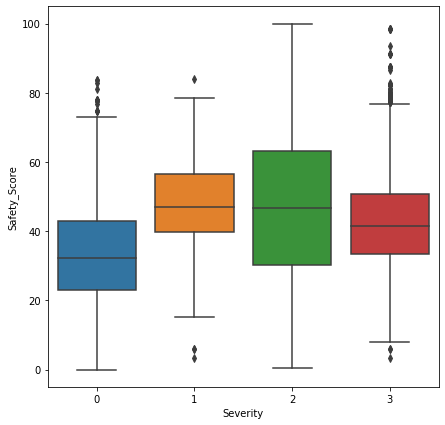

In [83]:
plt.figure(figsize=(7,7))
sns.boxplot(x = 'Severity', y ='Safety_Score' , data = df) 
plt.show()

# Label Encoding the Severity Column

In [16]:
from sklearn.preprocessing import LabelEncoder
le_Severity= LabelEncoder()
all_Severity = df.Severity
le_Severity.fit(all_Severity)

LabelEncoder()

In [17]:
df['Severity'] = le_Severity.transform(df['Severity'])


Droping the Accident_ID column

In [26]:
df.drop(labels=['Accident_ID'],inplace=True,axis=1)

In [27]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,1,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352
1,1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350
2,2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364
3,3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728
4,2,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883


Spilting the dataset into X and y

In [85]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [29]:
X

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,49.223744,14,22,71.285324,0.272118,78.04,2,31335.47682,3,0.424352
1,62.465753,10,27,72.288058,0.423939,84.54,2,26024.71106,2,0.352350
2,63.059361,13,16,66.362808,0.322604,78.86,7,39269.05393,3,0.003364
3,48.082192,11,9,74.703737,0.337029,81.79,3,42771.49920,1,0.211728
4,26.484018,13,25,47.948952,0.541140,77.16,3,35509.22852,2,0.176883
...,...,...,...,...,...,...,...,...,...,...
9995,56.118721,8,1,63.445761,0.482359,78.64,5,38537.36341,2,0.026150
9996,40.365297,10,7,62.169553,0.421775,79.77,4,40846.91690,2,0.074898
9997,27.853881,17,1,69.598906,0.318277,80.37,3,33771.99630,3,0.168173
9998,56.210046,8,0,39.835916,0.598118,76.92,5,39820.41925,2,0.026381


In [30]:
y

0       1
1       1
2       2
3       3
4       2
       ..
9995    3
9996    0
9997    3
9998    1
9999    0
Name: Severity, Length: 10000, dtype: int32

# Performing the Train Test Spilt on the dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Standard Scaling the dataset

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [40]:
X_train = sc.fit_transform(X_train)

In [41]:
X_test = sc.fit_transform(X_test)

# Importing the RandomForestClassifier for building the model

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import math
from math import log

Using hyperparameters for parameter tuning

In [71]:
hyperparameters= dict(n_estimators=[1,2,4,8,16,32,64,100,200], max_depth=np.linspace(1,32,32, endpoint=True),min_samples_split=[1,2,5,10,15,100],min_samples_leaf=[1,2,5,10],max_features=[math.log2,math.sqrt, None])

In [73]:
clf=RandomizedSearchCV(RandomForestClassifier(), hyperparameters, random_state=1, cv=5, verbose=0,scoring='neg_mean_squared_error')

In [74]:
best_model=clf.fit(X_train,y_train)

# Determining the best fit parameters for training the model

In [75]:
best_model.best_params_

{'n_estimators': 16,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 19.0}

In [76]:
clf=RandomForestClassifier(n_estimators=16,
                         min_samples_split=5,
                         min_samples_leaf=2,
                          max_features=None,
                         max_depth=19.0)

 Training the model with test data

In [77]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=19.0, max_features=None,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Predicting the Severity from test data

In [78]:
y_pred=clf.predict(X_test)

In [80]:
from sklearn.metrics import classification_report

# Classification Report

In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       906
           1       0.94      0.94      0.94       762
           2       0.93      0.93      0.93       502
           3       0.94      0.94      0.94       830

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000



# Hence with the help of Random Forest Classifier different Severity was classified with an accuracy of .94